<a href="https://colab.research.google.com/github/JairoRotava/UFPEL/blob/main/aed/Semana_VI_Grafos_ord_top_CFC_AEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana VI - Ordenacao Topologica, CFC e AEM

In [ ]:
!pip install graphviz

You should consider upgrading via the '/home/jairo/opencv-course/bin/python3 -m pip install --upgrade pip' command.


## Ordenação topologica e componentes fortementes conectados

In [3]:
#@title Codigo ordenacao topologica e componentes fortemente conectados
# Python program to print topological sorting of a DAG
#https://www.geeksforgeeks.org/topological-sorting/

import graphviz
from collections import defaultdict

# Class to represent a graph


class Graph:
    
    def __init__(self, nodes=0):
        self.graph = defaultdict(list) # dictionary containing adjacency List
        self.visited = defaultdict(lambda: False)
        self.stack = []
        self.V = nodes
       
    # function to add an edge to graph
    def addNode(self, u, v):
        self.graph[u] = v
        self.V = len(self.graph)
        
    # Add edge into the graph
    def add_edge(self, s, d):
        self.graph[s].append(d)

    # A recursive function used by topologicalSort
    def topologicalSortUtil(self, v):

        # Mark the current node as visited.
        self.visited[v] = True

        # Recur for all the vertices adjacent to this vertex
        for i in self.graph[v]:
            if self.visited[i] == False:
                self.topologicalSortUtil(i)

        # Push current vertex to stack which stores result
        #print(v)
        self.stack.append(v)

    # The function to do Topological Sort. It uses recursive
    # topologicalSortUtil()
    def topologicalSort(self):
        # Mark all the vertices as not visited
        #visited = [False]*len(self.graph)
        self.stack = []

        # Call the recursive helper function to store Topological
        # Sort starting from all vertices one by one
        #for i in range(len(self.graph)):
        for i in self.graph:
            if self.visited[i] == False:
                self.topologicalSortUtil(i)

        # Print contents of the stack
        return self.stack
        
    def print_graph(self):
       
        dot = graphviz.Digraph()
            
        for key, value in self.graph.items():
            dot.node(name=str(key), label=str(key))
            for v in value:
                dot.edge(str(key),str(v))
            
        display(dot)
        
    def bfs(self, s):
        G = self.graph
        BRANCO = 0
        CINZA = 1,
        PRETO = 2
        cor = {}
        d = {},
        pred = {}
        
        for key in G:
            cor[key] = BRANCO
            d[key] = None
            pred[key] = None
        
        cor[s] = CINZA
        d[s] = 0
        pred[s] = None
        
    
        Q = collections.deque([s])
        while Q:
            u = Q.popleft()
            for v in G[u]:
                if cor[v] == BRANCO:
                    cor[v] = CINZA
                    d[v] = d[u] + 1
                    pred[v] = u
                    Q.append(v)
                cor[u] = PRETO
        return d
    
    # Algoritmo apresentacao marilton/livro
    def dfs(self):
        G = self.graph
        BRANCO = 0
        CINZA = 1
        PRETO = 2
        cor = {}
        d = {}
        pred = {}
        f = {}
        tempo = 0

        def dfs_visit(u):
            cor[u] = CINZA
            nonlocal tempo
            tempo = tempo + 1
            d[u] = tempo
            for v in G[u]:
                if cor[v] == BRANCO:
                    pred[v] = u
                    dfs_visit(v)
            cor[u] = PRETO
            tempo = tempo + 1
            f[u] = tempo


        for u in G:
            cor[u] = BRANCO
            pred[u] = None

        for u in G:
            if cor[u] == BRANCO:
                dfs_visit(u)

        return d, f
    
    # transpose the matrix
    def transpose(self):
        g = Graph(self.V)

        for i in self.graph:
            for j in self.graph[i]:
                g.add_edge(j, i)
        # Checa se nao esta faltando nenhum no
        for i in self.graph:
            if i not in g.graph:
                g.addNode(i,[])
                
        return g
    
    # Print stongly connected components
    def scc(self):
        scc_list = [[]]
        # dfs
        def dfs(graph, d, visited_vertex):
            visited_vertex[d] = True
            #print(d, end='')
            #nonlocal scc_list
            scc_list[-1].append(d)
            for i in graph[d]:
                if not visited_vertex[i]:
                    dfs(graph, i, visited_vertex)

        def fill_order(d, visited_vertex, stack):
            visited_vertex[d] = True
            for i in self.graph[d]:
                if not visited_vertex[i]:
                    fill_order(i, visited_vertex, stack)
            stack = stack.append(d)

        # transpose the matrix
        def transpose():
            g = Graph(self.V)

            for i in self.graph:
                for j in self.graph[i]:
                    g.add_edge(j, i)
            return g

        stack = []
        # visited_vertex = [False] * (self.V)
        visited_vertex = defaultdict(lambda: False)

        # for i in range(self.V):
        for i in self.graph:
            if not visited_vertex[i]:
                fill_order(i, visited_vertex, stack)

        gr = transpose()

        # visited_vertex = [False] * (self.V)
        visited_vertex = defaultdict(lambda: False)

        while stack:
            i = stack.pop()
            if not visited_vertex[i]:
                #gr.dfs(i, visited_vertex)
                dfs(gr.graph, i, visited_vertex)
                scc_list.append([])
                #print("")
        scc_list.pop()
        return scc_list
    

## Exemplo S256

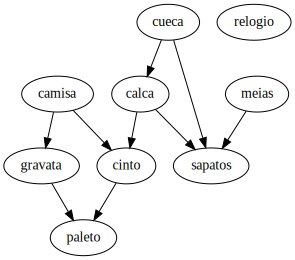

DFS
camisa: 1/8
gravata: 2/5
cinto: 6/7
paleto: 3/4
relogio: 9/10
cueca: 11/16
calca: 12/15
sapatos: 13/14
meias: 17/18
Ordem topologica
meias cueca calca sapatos relogio camisa cinto gravata paleto 

In [4]:
# Driver Code
g = Graph()
g.addNode('camisa', ['gravata', 'cinto'])
g.addNode('gravata', ['paleto'])
g.addNode('cinto', ['paleto'])
g.addNode('paleto', [])
g.addNode('relogio', [])
g.addNode('cueca', ['calca', 'sapatos'])
g.addNode('calca', ['cinto', 'sapatos'])
g.addNode('sapatos', [])
g.addNode('meias', ['sapatos'])

g.print_graph()


print("DFS")
d, f = g.dfs()
for key in g.graph:
    print("{}: {}/{}".format(key, d[key], f[key]))


print ("Ordem topologica")
stack = g.topologicalSort()
# Imprime topologia fazendo POP da stack (mesmo que ordem revesa da lista)
while stack:
    print(stack.pop(), end = " ")

## Exemplo S278

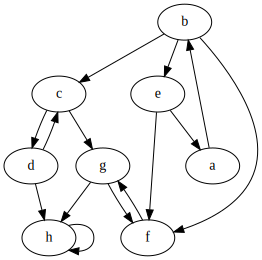

DFS
c: 1/10
b: 11/16
a: 13/14
d: 8/9
e: 12/15
f: 3/4
g: 2/7
h: 5/6
Componentes fortemente conectados:
[['b', 'a', 'e'], ['c', 'd'], ['g', 'f'], ['h']]


In [5]:
ex_s278 = Graph()
ex_s278.addNode('c', ['g', 'd'])
ex_s278.addNode('b', ['c', 'e', 'f'])
ex_s278.addNode('a', ['b'])
ex_s278.addNode('d', ['c', 'h'])
ex_s278.addNode('e', ['a', 'f'])
ex_s278.addNode('f', ['g'])
ex_s278.addNode('g', ['f', 'h'])
ex_s278.addNode('h', ['h'])

ex_s278.print_graph()

print("DFS")
d, f = ex_s278.dfs()
for key in ex_s278.graph:
    print("{}: {}/{}".format(key, d[key], f[key]))

scc = ex_s278.scc()

print("Componentes fortemente conectados:\n{}".format(scc))

## S320E1 Mostre a ordenação topológica sobre o grafo abaixo:

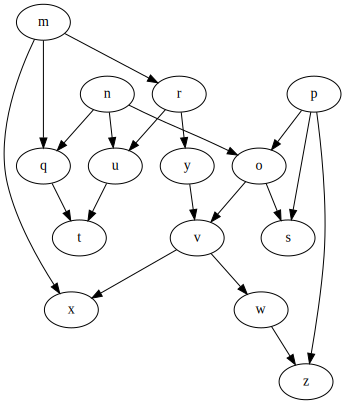

DFS
m: 1/20
n: 21/26
o: 22/25
p: 27/28
q: 2/5
r: 6/19
s: 23/24
t: 3/4
u: 7/8
v: 10/17
w: 11/14
x: 15/16
y: 9/18
z: 12/13
Ordem topologica:
p n o s m r y v x w z u q t 

In [7]:
# Driver Code
graph_s320e1 = Graph()
graph_s320e1.addNode('m', ['q', 'r', 'x'])
graph_s320e1.addNode('n', ['o', 'q', 'u' ])
graph_s320e1.addNode('o', ['s', 'v'])
graph_s320e1.addNode('p', ['o', 's', 'z'])
graph_s320e1.addNode('q', ['t'])
graph_s320e1.addNode('r', ['u', 'y'])
graph_s320e1.addNode('s', [])
graph_s320e1.addNode('t', [])
graph_s320e1.addNode('u', ['t'])
graph_s320e1.addNode('v', ['w', 'x'])
graph_s320e1.addNode('w', ['z'])
graph_s320e1.addNode('x', [])
graph_s320e1.addNode('y', ['v'])
graph_s320e1.addNode('z', [])


graph_s320e1.print_graph()

print("DFS")
d, f = graph_s320e1.dfs()
for key in graph_s320e1.graph:
    print("{}: {}/{}".format(key, d[key], f[key]))

print ("Ordem topologica:")
stack = graph_s320e1.topologicalSort()
# Imprime topologia fazendo POP da stack (mesmo que ordem revesa da lista)
while stack:
    print(stack.pop(), end = " ")

## S320E2 Mostre os componentes fortemente conectados do grafo apresentado no slide 253

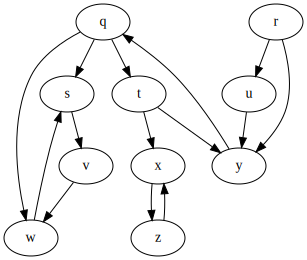

DFS
q: 1/16
r: 17/20
s: 2/7
t: 8/15
u: 18/19
v: 3/6
w: 4/5
x: 9/12
y: 13/14
z: 10/11
Grafo transposto


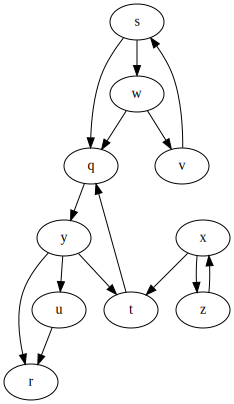

TODO: ordenar os pontos de acordo com f
Componentes fortemente conectados:
[['r'], ['u'], ['q', 'y', 't'], ['x', 'z'], ['s', 'w', 'v']]


In [7]:
graph_s320e2 = Graph()
graph_s320e2.addNode('q', ['s', 't', 'w'])
graph_s320e2.addNode('r', ['u', 'y'])
graph_s320e2.addNode('s', ['v'])
graph_s320e2.addNode('t', ['x', 'y'])
graph_s320e2.addNode('u', ['y'])
graph_s320e2.addNode('v', ['w'])
graph_s320e2.addNode('w', ['s'])
graph_s320e2.addNode('x', ['z'])
graph_s320e2.addNode('y', ['q'])
graph_s320e2.addNode('z', ['x'])

graph_s320e2.print_graph()

print("DFS")
d, f = graph_s320e2.dfs()
for key in graph_s320e2.graph:
    print("{}: {}/{}".format(key, d[key], f[key]))
    
print("Grafo transposto")
gt = graph_s320e2.transpose()
gt.print_graph()

print("TODO: ordenar os pontos de acordo com f")

scc = graph_s320e2.scc()

print("Componentes fortemente conectados:\n{}".format(scc))


## Arvores espalhadas mínimas.

## Kruskal's 

In [97]:
#@title Arvores espahadas mínimas - Algoritmo de Kruskal
#https://algotree.org/algorithms/minimum_spanning_tree/kruskals/
    
class Edge :

   def __init__(self, arg_src, arg_dst, arg_weight) :
       self.src = arg_src
       self.dst = arg_dst
       self.weight = arg_weight

class Graph:

    def __init__(self, arg_num_nodes, arg_edgelist) :
        self.num_nodes = arg_num_nodes
        self.edgelist  = arg_edgelist
        self.parent    = []
        self.rank      = []
        # mst stores edges of the minimum spanning tree
        self.mst       = []

    def FindParent(self, node) :

        if self.parent[node] == node :
           return node
        return self.FindParent(self.parent[node])

    def KruskalMST(self) :

        # Sort objects of an Edge class based on attribute (weight)
        self.edgelist.sort(key = lambda Edge : Edge.weight)

        self.parent = [None] * self.num_nodes
        self.rank   = [None] * self.num_nodes

       

        for n in range(self.num_nodes) :
            self.parent[n] = n # Every node is the parent of itself at the beginning
            self.rank[n] = 0   # Rank of every node is 0 at the beginning

        for edge in self.edgelist :
            root1 = self.FindParent(edge.src)
            root2 = self.FindParent(edge.dst)

            # Parents of the source and destination nodes are not in the same subset
            # Add the edge to the spanning tree
            if root1 != root2 :
               self.mst.append(edge)
               if self.rank[root1] < self.rank[root2] :
                  self.parent[root1] = root2
                  self.rank[root2] += 1
               else :
                  self.parent[root2] = root1
                  self.rank[root1] += 1

        #print("\nEdges of minimum spanning tree in graph :", end=' ')
        cost = 0
        min_span_tree = defaultdict(list)
        for edge in self.mst :
            #print("[" + str(edge.src) + "-" + str(edge.dst) + "](" + str(edge.weight) + ")", end = ' ')
            cost += edge.weight
            min_span_tree[edge.src].append((edge.dst, edge.weight))
        #rint("\nCost of minimum spanning tree : " +str(cost))

        return min_span_tree, cost        
        
    def convert_to_dict(self):
        # Cria um dicionario dos nos com as arestas...um formato mais amigavel para imprimir    
        graph = defaultdict(list)
        for e in self.edgelist:
            graph[e.src].append((e.dst,e.weight))
            
        return graph
        
        
    def print_graph(self):
        graph = defaultdict(list)
       
        
        # Cria um dicionario dos nos com as arestas...um formato mais amigavel para imprimir    
        for e in self.edgelist:
            graph[e.src].append((e.dst,e.weight))
        
        dot = graphviz.Graph(strict=True)
            
        for key, value in graph.items():
            dot.node(name=str(key), label=str(key))
            for v in value:
                dot.edge(str(key),str(v[0]), label=str(v[1]))
            
        display(dot)

## S348E1 Mostre os algoritmos de Prim e de Kruskal para os grafos abaixo

## G1 Kruskal

Kruskal


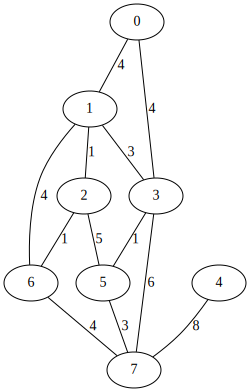

Arvore minima: defaultdict(<class 'list'>, {1: [(2, 1), (3, 3)], 2: [(6, 1)], 3: [(5, 1)], 5: [(7, 3)], 0: [(1, 4)], 4: [(7, 8)]})
Custo total 21


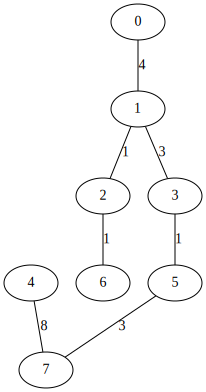

In [99]:
num_nodes = 8
edges = [
    Edge(0, 1, 4),
    Edge(0, 3, 4),

    Edge(1, 0, 4),
    Edge(1, 2, 1),
    Edge(1, 3, 3),
    Edge(1, 6, 4),
    
    Edge(2, 1, 1),
    Edge(2, 5, 5),
    Edge(2, 6, 1),
    
    Edge(3, 0, 4),
    Edge(3, 1, 3),
    Edge(3, 5, 1),
    Edge(3, 7, 6),
    
    Edge(4, 7, 8),
    
    Edge(5, 2, 5),
    Edge(5, 3, 1),
    Edge(5, 7, 3),
    
    Edge(6, 1, 4),
    Edge(6, 2, 1),
    Edge(6, 7, 4),
    
    Edge(7, 3, 6),
    Edge(7, 4, 8),
    Edge(7, 5, 3),
    Edge(7, 6, 4),
    ]


g1 = Graph(num_nodes, edges)
# Arvore convertida para dicionario para uso com algortimo prim
g1_dict = g1.convert_to_dict()

print("Kruskal")
g1.print_graph()
tree, cost  = g1.KruskalMST()

print("Arvore minima: {}".format(tree))
print("Custo total {}".format(cost))

dot = graphviz.Graph(strict=True)
    
for key, value in tree.items():
    dot.node(name=str(key), label=str(key))
    for v in value:
        dot.edge(str(key),str(v[0]), label=str(v[1]))
display(dot)


## G2 Kruskal

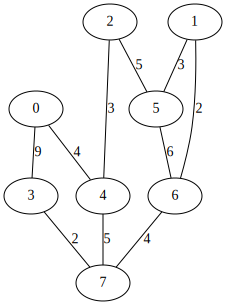

Kruskal
Arvore minima: defaultdict(<class 'list'>, {1: [(6, 2), (5, 3)], 3: [(7, 2)], 2: [(4, 3), (5, 5)], 0: [(4, 4)], 6: [(7, 4)]})
Custo total 23


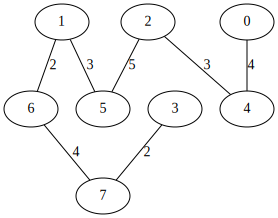

In [100]:
# G2

num_nodes = 8
edges = [
    Edge(0, 3, 9),
    Edge(0, 4, 4),
    
    Edge(1, 5, 3),
    Edge(1, 6, 2),
    
    Edge(2, 4, 3),
    Edge(2, 5, 5),
    
    Edge(3, 0, 9),
    Edge(3, 7, 2),
    
    Edge(4, 0, 4),
    Edge(4, 2, 3),
    Edge(4, 7, 5),
    
    Edge(5, 1, 3),
    Edge(5, 2, 5),
    Edge(5, 6, 6),
    
    Edge(6, 1, 2),
    Edge(6, 5, 6),
    Edge(6, 7, 4),
    
    Edge(7, 3, 2),
    Edge(7, 4, 5),
    Edge(7,6,4)
    ]


g2 = Graph(num_nodes, edges)
# Arvore convertida para dicionario para uso com algortimo prim
g2_dict = g2.convert_to_dict()

g2.print_graph()
print("Kruskal")
tree, cost  = g2.KruskalMST()

print("Arvore minima: {}".format(tree))
print("Custo total {}".format(cost))

dot = graphviz.Graph(strict=True)
    
for key, value in tree.items():
    dot.node(name=str(key), label=str(key))
    for v in value:
        dot.edge(str(key),str(v[0]), label=str(v[1]))
display(dot)


## Prim

In [101]:
#@title Algoritmo Prim
class Node :

    def __init__(self, arg_id) :
        self._id = arg_id

class Graph :

    def __init__(self, arg_source, arg_adj_list) :
        self.source = arg_source
        self.adjlist = arg_adj_list

    def PrimsMST(self):

        # Priority queue is implemented as a dictionary with
        # key as an object of 'Node' class and value as the cost of 
        # reaching the node from the source.
        # Since the priority queue can have multiple entries for the
        # same adjacent node but a different cost, we have to use objects as
        # keys so that they can be stored in a dictionary. 
        # [As dictionary can't have duplicate keys so objectify the key]

        # The distance of source node from itself is 0. Add source node as the first node
        # in the priority queue
        priority_queue = { Node(self.source) : (None,0) }
        added = [False] * len(self.adjlist)
        min_span_tree_cost = 0
        min_span_tree = defaultdict(list)
        min_tree = {}
        cost_list = []

        while priority_queue :
            # Choose the adjacent node with the least edge cost
            #node = min (priority_queue, key=priority_queue.get)
            node = min (priority_queue, key=lambda k: priority_queue[k][1])
            cost = priority_queue[node][1]
            source = priority_queue[node][0]

            # Remove the node from the priority queue
            del priority_queue[node]

            if added[node._id] == False :
                min_span_tree_cost += cost
                cost_list.append(cost)
                added[node._id] = True
                #print("Added Node : [{} - {}]".format(source,node._id) + ", cost now : "+str(min_span_tree_cost))
                if source is not None:
                  min_span_tree[source].append((node._id, cost))

                for item in self.adjlist[node._id] :
                    adjnode = item[0]
                    adjcost = item[1]
                    if added[adjnode] == False :
                        #priority_queue[Node(adjnode)] = adjcost
                        priority_queue[Node(adjnode)] = (node._id, adjcost)
                        
        # Converte os objetos para dicionario
        #tree = defaultdict(list)
        
        # Cria um dicionario dos nos com as arestas...um formato mais amigavel para imprimi   
        #last_node = min_span_tree.pop(0)._id
        #cost_list.pop(0)
       #for n,c in zip(min_span_tree, cost_list):
        #    tree[last_node] = [(n._id, c)]
         #   last_node = n._id
            
        #g_tree = Graph(self.source, tree)

        return min_span_tree, min_span_tree_cost
    
    def print_graph(self):
        graph = defaultdict(list)
       
               
        dot = graphviz.Graph(strict=True)
            
        for key, value in  self.adjlist.items():
            dot.node(name=str(key), label=str(key))
            for v in value:
                dot.edge(str(key),str(v[0]), label=str(v[1]))

        display(dot)

## S348E1 Mostre os algoritmos de Prim e de Kruskal para os grafos abaixo

## G1 Prim

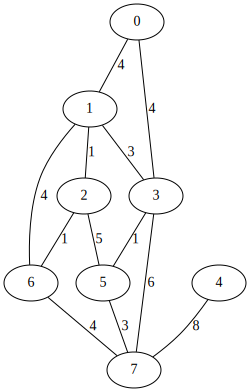

Prim
Custo 21


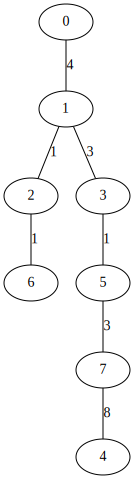

In [102]:
g1 = Graph(0, g1_dict)
g1.print_graph()

print("Prim")
tree, cost = g1.PrimsMST()
print("Custo {}".format(cost))

dot = graphviz.Graph(strict=True)
for key, value in tree.items():
    dot.node(name=str(key), label=str(key))
    for v in value:
        dot.edge(str(key),str(v[0]), label=str(v[1]))
display(dot)

## G2 Prim

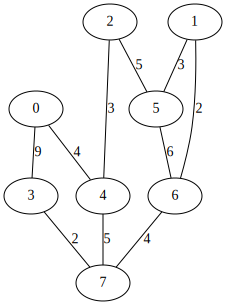

Prim
Custo 23


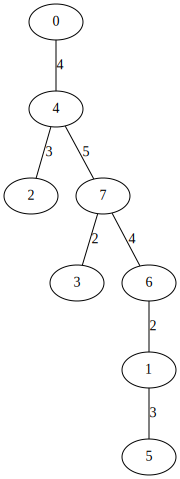

In [103]:
g2 = Graph(0, g2_dict)
g2.print_graph()
print("Prim")
tree, cost = g2.PrimsMST()
print("Custo {}".format(cost))

dot = graphviz.Graph(strict=True)
    
for key, value in tree.items():
    dot.node(name=str(key), label=str(key))
    for v in value:
        dot.edge(str(key),str(v[0]), label=str(v[1]))
display(dot)